#Seaborn - LE DUC ANH - 15/APRIL/2025 - Python notebook

##1. Improving Matplotlib with Default Styles using Seaborn

### 0. Behind the scene

In [ ]:
pip install seaborn # just a simple installation

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- basically, inside seaborn, there we have various datasets that is automatically created using seaborn, up there are those datasets
- lets just "titanic"

###1.0 Seaborn's datasets

In [ ]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.survived.replace([0,1], ["DEMISED", "ALIVE"], inplace = True)
data

<ipython-input-10-86b5b9149aae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.survived.replace([0,1], ["DEMISED", "ALIVE"], inplace = True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,DEMISED,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,ALIVE,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,ALIVE,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,ALIVE,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,DEMISED,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,DEMISED,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,ALIVE,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,DEMISED,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,ALIVE,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info() #from this, we can see that columnh deck has a lot of erroneous place, and so do age column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(6)
memory usage: 80.7+ KB


In [ ]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
(data.isnull().mean() * 100).round(2).astype(str) + '%'

,0
survived,0.0%
pclass,0.0%
sex,0.0%
age,19.87%
sibsp,0.0%
parch,0.0%
fare,0.0%
embarked,0.22%
class,0.0%
who,0.0%


- this is the wy to see how many errors or pplaces that lacks data inside the datasets that is considered as null, and with sum() will find the amount of nulls inside each column of the specified datasets



```
 Variable     | Definition                      | Key                                       |
|--------------|----------------------------------|-------------------------------------------|
| survival     | Survival                        | 0 = No, 1 = Yes                          |
| pclass       | Ticket class                    | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| sex          | Sex                             |                                           |
| Age          | Age in years                    |                                           |
| sibsp        | # of siblings / spouses aboard the Titanic |                           |
| embarked     | Port of Embarkation             | C = Cherbourg, Q = Queenstown, S = Southampton |
| fare         | Passenger fare                  |                                           |
| class        | Class                           |                                           |
| who          | man, woman, child               |                                           |
| adult_male   | True, False                     |                                           |
| deck         | Passenger's cabins              |                                           |
| embark_town  | Port of Embarkation             | Cherbourg, Queenstown, Southampton        |
| alive        | no, yes                         |                                           |
| alone        | False, True                     |                                           |

```



In [ ]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
data.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

##2. Graph Types

- Seaborn is a python data visualization library based on matplotlib, nevertheless, it provides a higher-level interface for drawing attractive and informative statistical graphics
- We can also improving Matplotlib through Seaborn

###2.1 Lineplot

In [ ]:
data.columns #take all of the column's name

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: xlabel='age', ylabel='fare'>

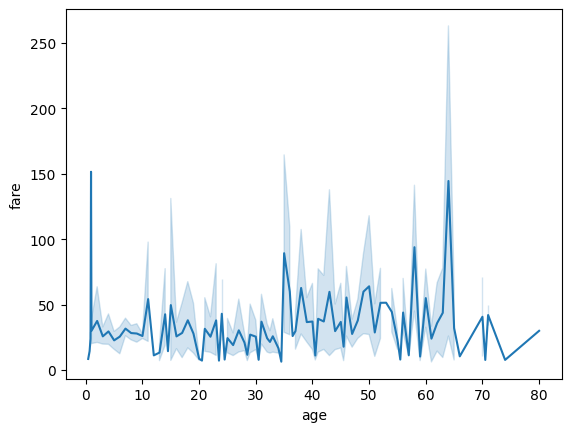

In [ ]:
sns.lineplot(data=data,x='age',y='fare')
#so this is pretty different from matplotlib, why matplotlib only need raw datasets that as long as its length matches, it is satisfied
#in seaborn lineplot, it have to speficy the datasets that we're working with, this seems to be datasets frendly
#x and y is then will be imported fromt the specified datasets
#since there are alot of first inside the class, the less visible one lis the ranges of the 'fare', and the line is the mean of all of them

<Axes: xlabel='age', ylabel='fare'>

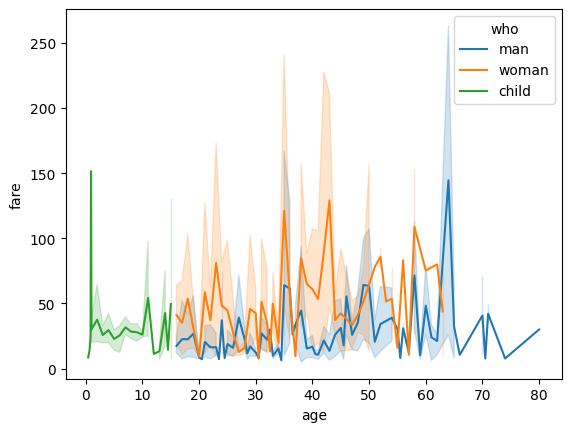

In [ ]:
sns.lineplot(data=data,x='age',y='fare', hue='who')

<Axes: xlabel='class', ylabel='fare'>

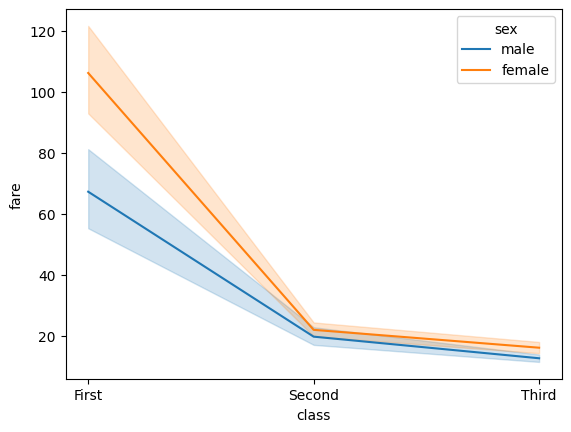

In [ ]:
sns.lineplot(data=data,x='class',y='fare', hue='sex')
#another criteria, which is the relations between class and fare in term of sex

###2.2 Scatter plot and Bubble plots

<Axes: xlabel='age', ylabel='fare'>

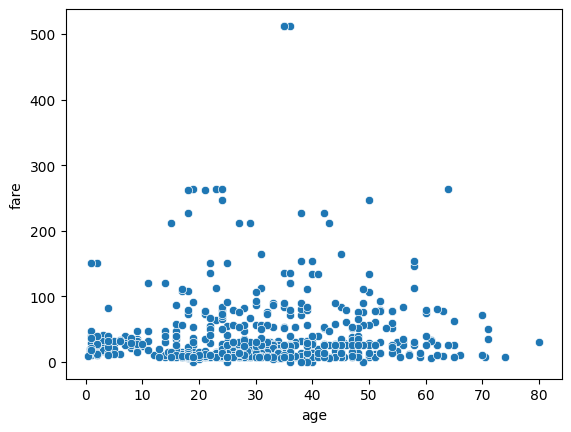

In [ ]:
sns.scatterplot(data=data, x='age', y='fare')

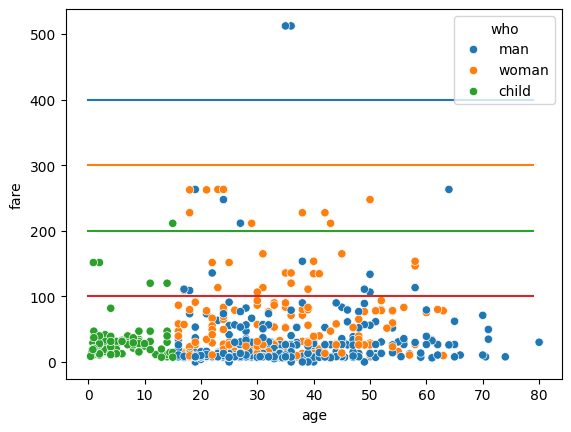

In [ ]:
sns.scatterplot(data=data, x='age',y='fare', hue='who')
plt.plot(range(0,80),[400]*80)
plt.plot(range(0,80),[300]*80)
plt.plot(range(0,80),[200]*80)
plt.plot(range(0,80),[100]*80)

- interestingly, there seems to devided into certain stages, like from 0-100, 100-200,200-300 and there are 2 customers who are up more than 500
- and they're both man
- at the third stage (200-300) women visually take on the most
- at the last two, seems like the children are less at the third and mostly on the last-> insight: maybe children cost less to get on the ship, the last 2 are more affordable and usually for the common.
- using seaborn is really useful on analizing different stages on the sets

<Axes: xlabel='age', ylabel='fare'>

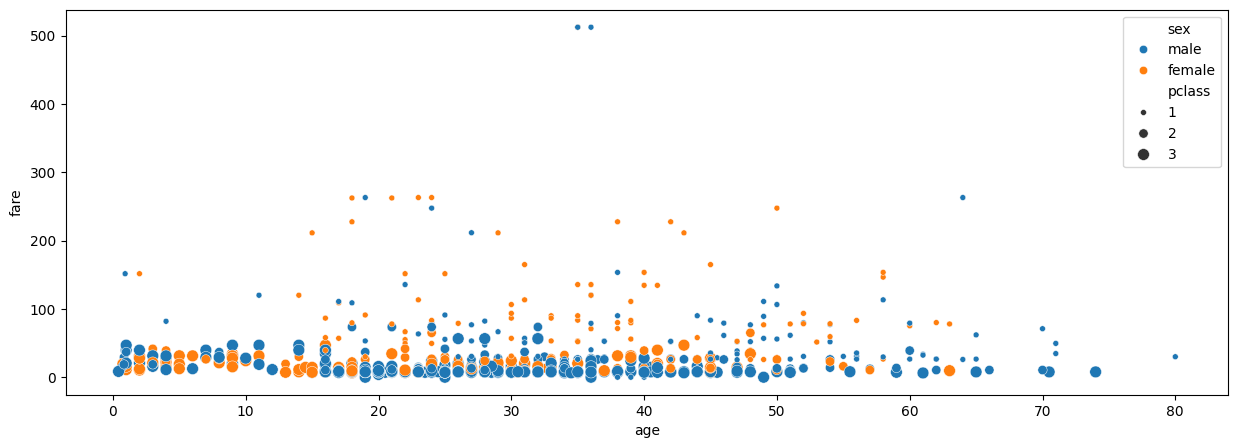

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(
    data=data,
    x='age',
    y='fare',
    hue='sex',
    size="pclass" #class
)

###2.3 Joint Plot

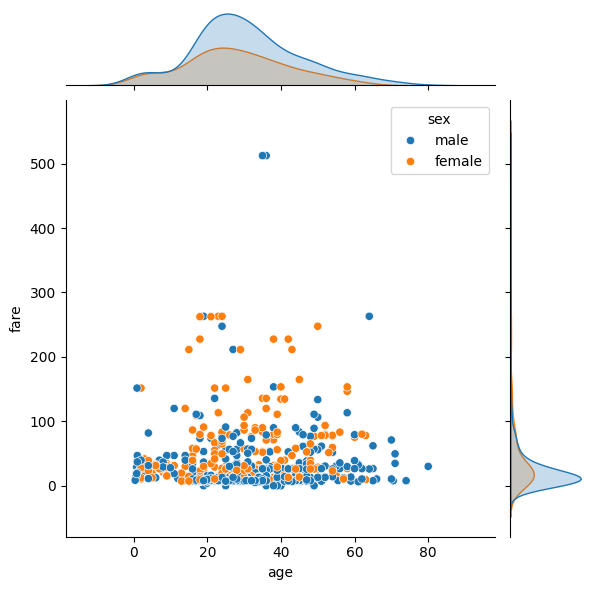

In [ ]:
sns.jointplot(
    data=data,
    x='age',
    y='fare',
    hue='sex',
)

- they concentrate at the age of 20 and 40, and man obviously are more dense than women at that age and from then onwards
- vertically, they concentrate at the ranges of fare in between 0-100 dollars
- nevertheless, man are still denser at that ranges
- also, male are having a range denser than women in term of fare

###2.4 regplot

<Axes: xlabel='age', ylabel='fare'>

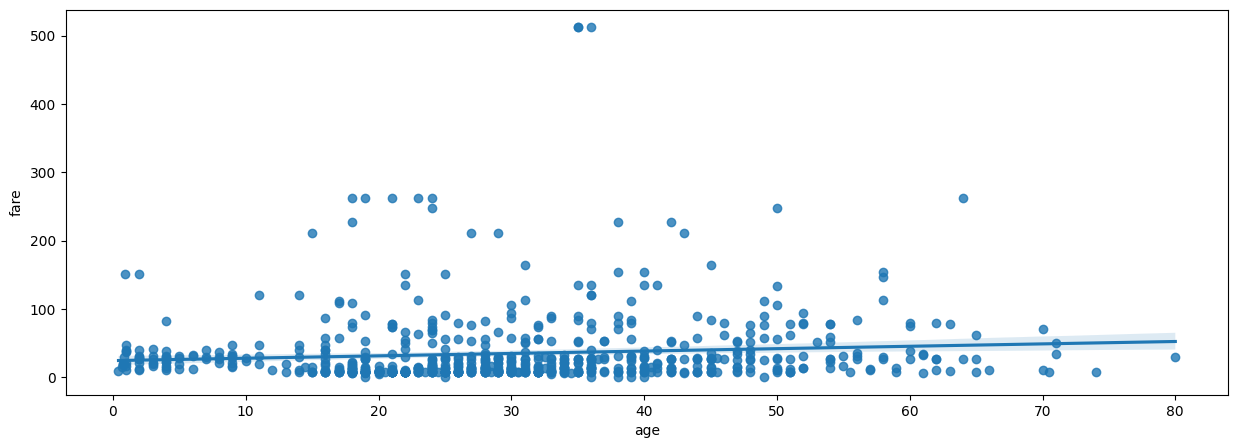

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot(data=data, x='age',y='fare') # this doesn't have a hue

<Figure size 1500x500 with 0 Axes>

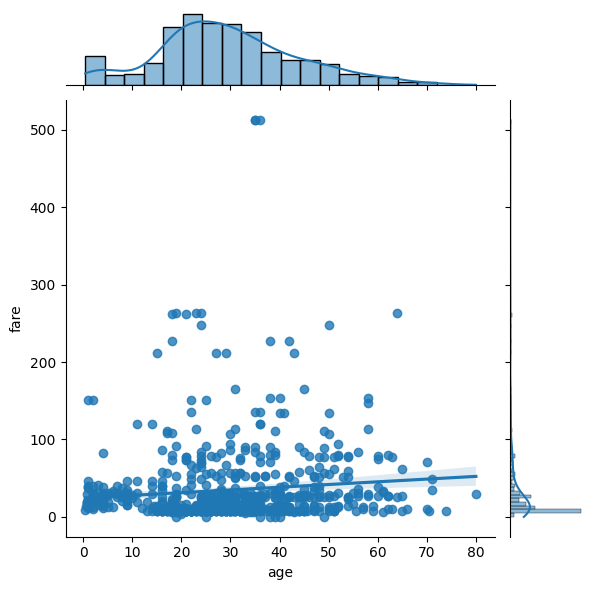

In [ ]:
plt.figure(figsize=(15,5))
sns.jointplot(
    data=data,
    x='age',
    y='fare',
    kind='reg' #kind means to have a type of illustration over the opposite xy axes
) #this doesn't have a hue either since there is a kind='reg' means reg plot incorporated


###2.5 Barplot

<Axes: xlabel='sex', ylabel='survived'>

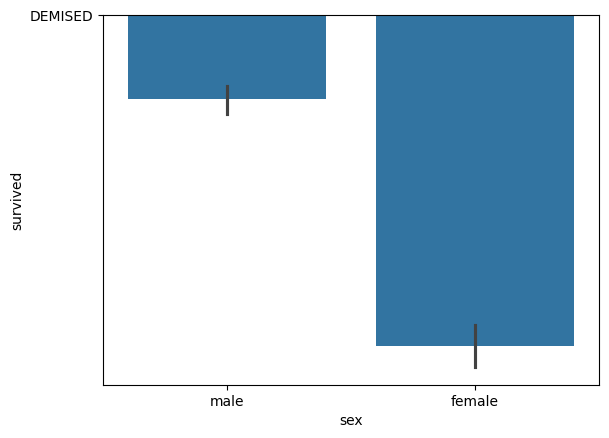

In [ ]:
sns.barplot(
    data=data,
    x='sex',
    y='survived'
)

<Axes: xlabel='sex', ylabel='survived'>

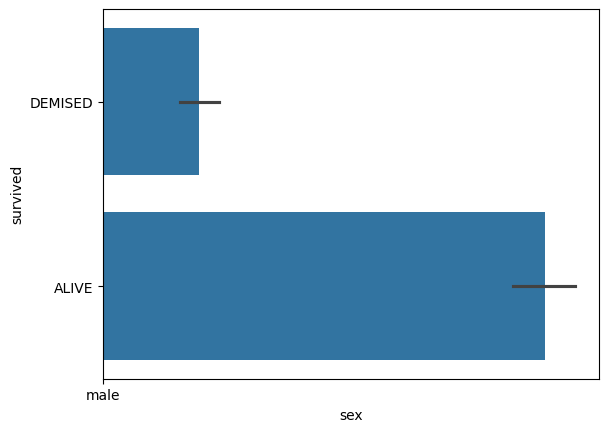

In [ ]:
sns.barplot(
    data=data,
    x='sex',
    y='survived',
    orient = "h"
)

<Axes: xlabel='sex', ylabel='survived'>

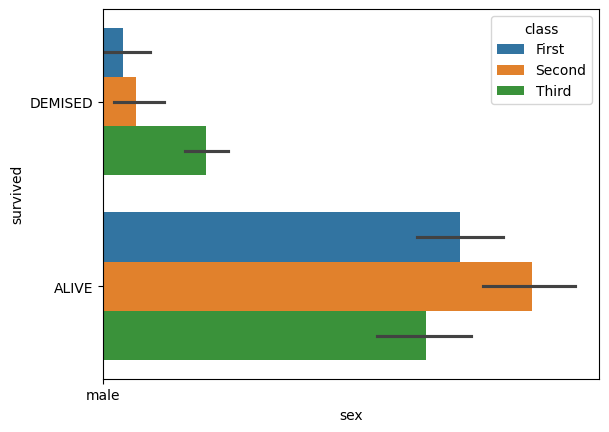

In [ ]:
sns.barplot(
    data=data,
    x='sex',
    y='survived',
    orient = "h",
    hue = "class"
) # instead of calculating like in plt, using sns on multiple graph into one are way convinient

to change the way the bar graph represents, we can use the orient Parameter, with h stands for horizontal and v stands for vertical


### 2.6 Histogram/ Hisplot

<Axes: xlabel='age', ylabel='Count'>

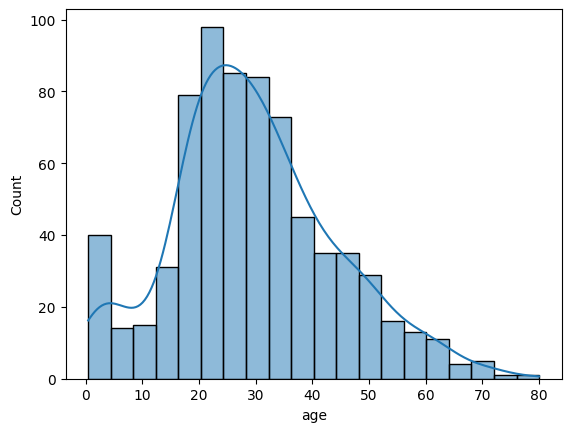

In [ ]:
sns.histplot(data=data, x="age", kde = True)

so it serves like an plt histogram, but in a different syntax

<Axes: ylabel='Count'>

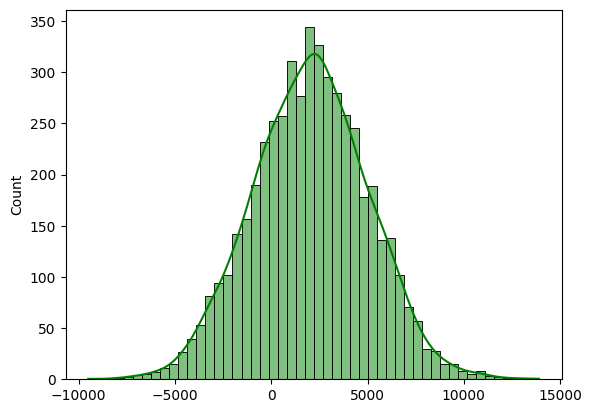

In [ ]:
sns.histplot(x=np.random.normal(2000,3000,5000), kde = True, color = "green")

<Axes: xlabel='age', ylabel='Count'>

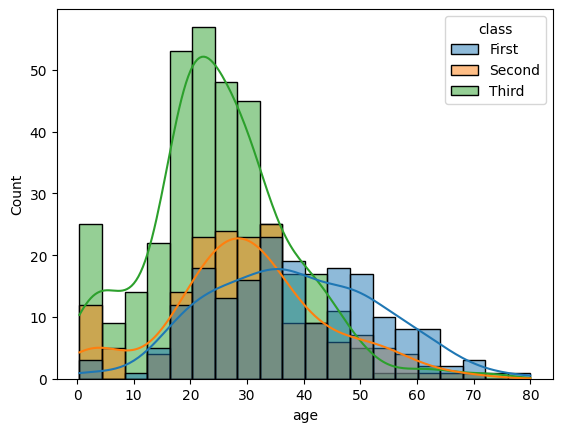

In [ ]:
sns.histplot(data=data, x="age", hue = 'class', kde = True)

- kde: is a line that shows the density of the datapoint inside the graph
- inside a historam, we can have different hues

### 2.7 box plot / boxplot

<Axes: xlabel='class', ylabel='age'>

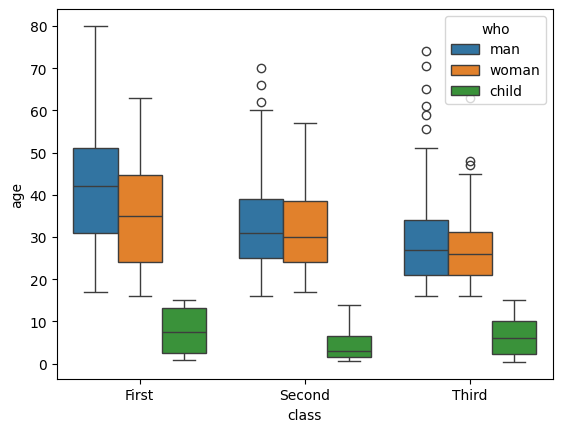

In [ ]:
sns.boxplot(data=data, x='class', y = 'age', hue = 'who')

- first of all, sns box plot is relatively simple, and quite universal, especially at limited x-axis
- second of all, those small dots over there are represents outliers, which are data points that fall out the typical range of the datasets, or basically anomalies/unique Variables
- using hue in a boxplot is pretty convinient and possible.

<Axes: xlabel='class', ylabel='age'>

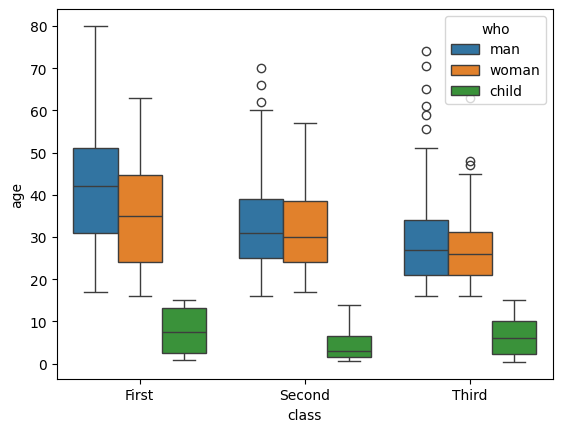

In [ ]:
meanprops = {'marker':'o',
             'markeredgecolor':'white',
             'markerfacecolor':'red',
             'markersize':'5'}
sns.boxplot(data=data, x='class', y = 'age', hue = 'who', meanprops = meanprops) #designing the props, showmeans=True #to show the props)
# this is quite intricate, since not only we have to establish the meanprops manually outside, but it has to say weather to showmeans or not.
# the show means parameters are quite self explainatory, which is basically will point the mean of the range in each box plot

### 2.8 Violin plot/ Violinplot

<Axes: xlabel='class', ylabel='age'>

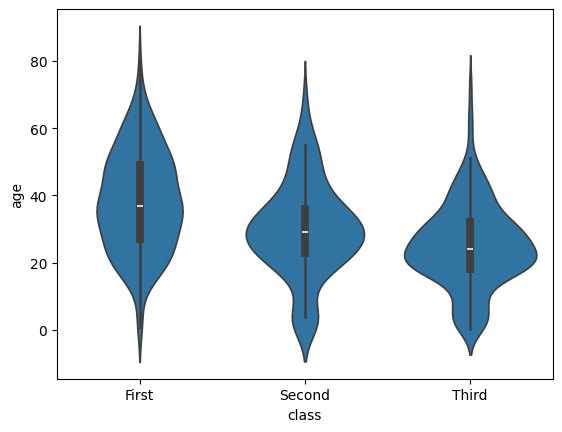

In [ ]:
sns.violinplot(data=data, x='class', y = 'age')

<Axes: xlabel='class', ylabel='age'>

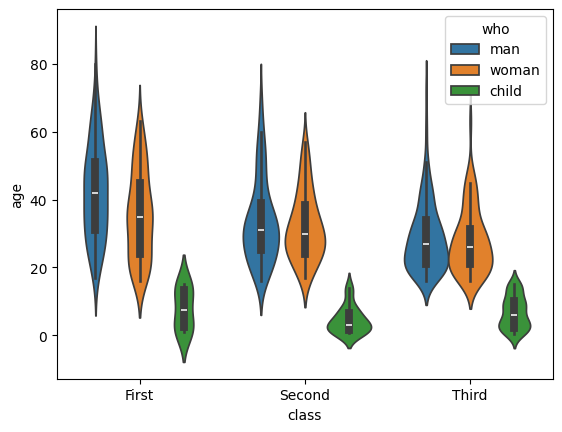

In [ ]:
sns.violinplot(data=data, x='class', y = 'age', hue = 'who')

<Axes: xlabel='class', ylabel='age'>

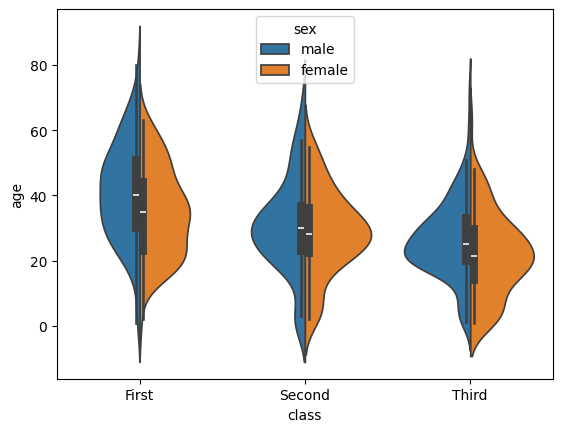

In [ ]:
sns.violinplot(data=data, x='class', y = 'age', hue = 'sex', split= True) #this is a way to see the reference between man and women in each levels of the ship

Why Violin plot is better than Box plot?


Box-and-whisker plots are great. They show medians, ranges and variabilities effectively. They allow comparing groups of different sizes. But box plots can be misleading. They are not affected by data’s distribution. When the data “morph” but manage to maintain their stat summaries (medians and ranges), their box plots stay the same.

### 2.9 heatmap plot/ heatmap

In [ ]:
n = random.randint(15,20)
square_array=np.random.rand(n,n)
square_array

array([[0.69545645, 0.95076119, 0.21713547, 0.86373454, 0.57309794,
        0.09593692, 0.9844938 , 0.5034968 , 0.77628319, 0.57946479,
        0.98436831, 0.72984876, 0.07406447, 0.42686708, 0.61270897,
        0.58683133, 0.68851373],
       [0.4078621 , 0.41352426, 0.27125249, 0.79900846, 0.20827081,
        0.38538207, 0.86260316, 0.56070207, 0.55514434, 0.11769126,
        0.88455013, 0.01510352, 0.18191067, 0.13860943, 0.12675841,
        0.6519292 , 0.70157613],
       [0.61099523, 0.3989724 , 0.78171767, 0.67146767, 0.3994347 ,
        0.72420963, 0.05637382, 0.67841566, 0.79550257, 0.28479122,
        0.72640975, 0.17217831, 0.68819936, 0.91132377, 0.29695379,
        0.59355943, 0.06587819],
       [0.89433207, 0.92252007, 0.3523816 , 0.29275606, 0.12977392,
        0.72633917, 0.76904142, 0.89505447, 0.04975615, 0.738708  ,
        0.64308077, 0.59362823, 0.97817242, 0.53585491, 0.42926744,
        0.70140177, 0.41454061],
       [0.9716029 , 0.39706641, 0.5403059 , 0.561548

<Axes: >

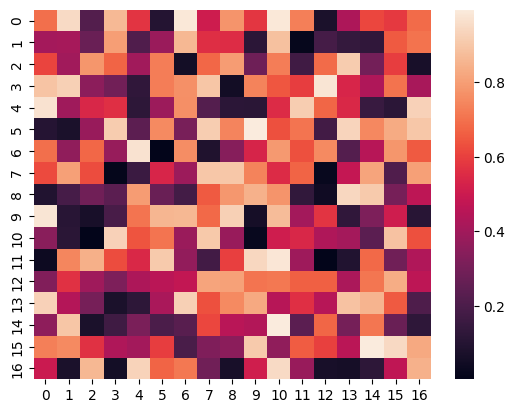

In [ ]:
sns.heatmap(data=square_array)

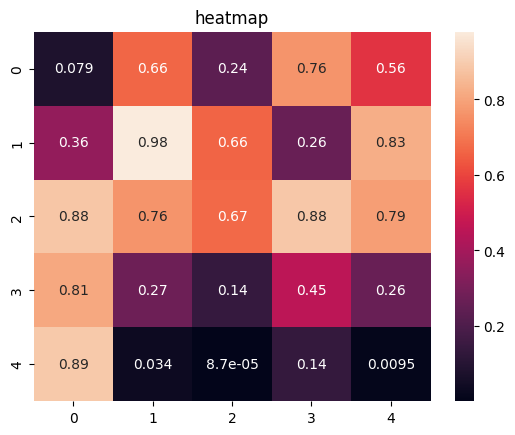

In [ ]:
n = random.randint(5,5)
square_array=np.random.rand(n,n)
sns.heatmap(data=square_array, annot = True, cbar=True) #show the colorspectrum bar #to show the number in each squares annot stands for annotations, which basically add a number in everysquare, infact, each numbers has the ability to change its colors, making the heatmap from seaborn looks quite aestetic and humble
plt.title('heatmap')#moreover, plt.heatmap() is not used in sns, since the heatmap itself have a parameters to dictate that problems
plt.show()

### 2.10 count graph

<Axes: xlabel='who', ylabel='count'>

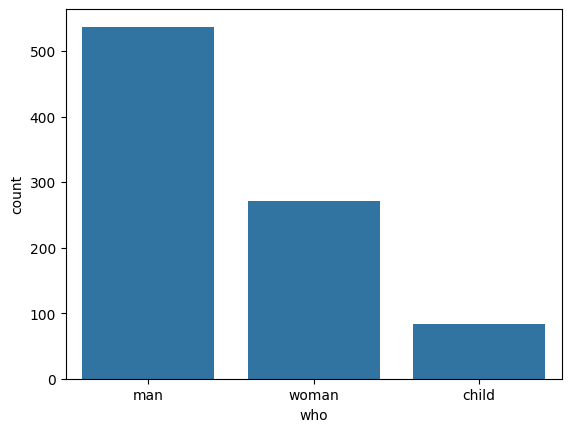

In [ ]:
sns.countplot(data=data, x='who')

<Axes: xlabel='who', ylabel='count'>

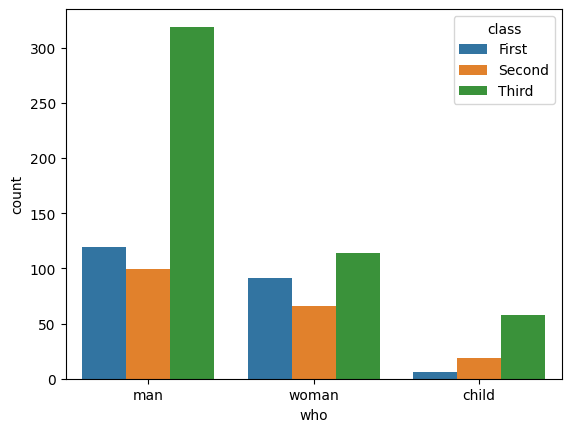

In [ ]:
sns.countplot(x='who', hue = 'class', data=data)

<Axes: xlabel='count', ylabel='who'>

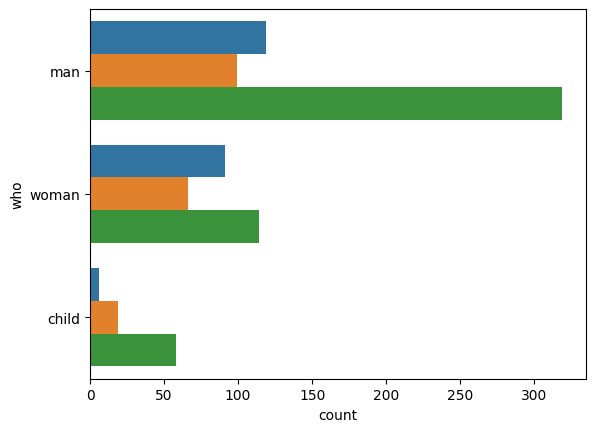

In [ ]:
sns.countplot(y='who', hue = 'class', data=data, legend=False) #when instead of x=, we can y= to retrieve a horizonal graph
#we can also delete legend with legend=False parameter

### 2.11 Stripplot

- strip plot is basically a really detailed box plot but merging with scatterplots

<Axes: xlabel='survived', ylabel='age'>

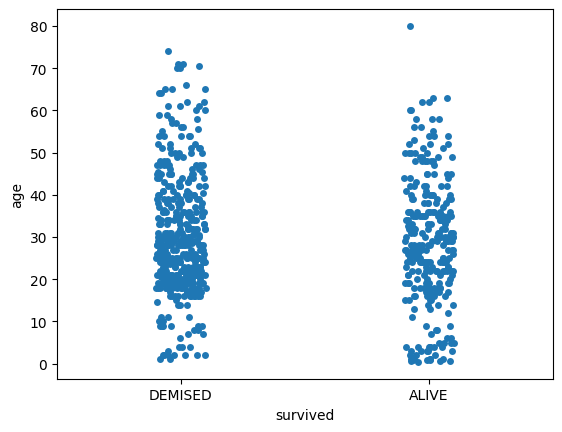

In [ ]:
sns.stripplot(data=data, x='survived', y ='age')

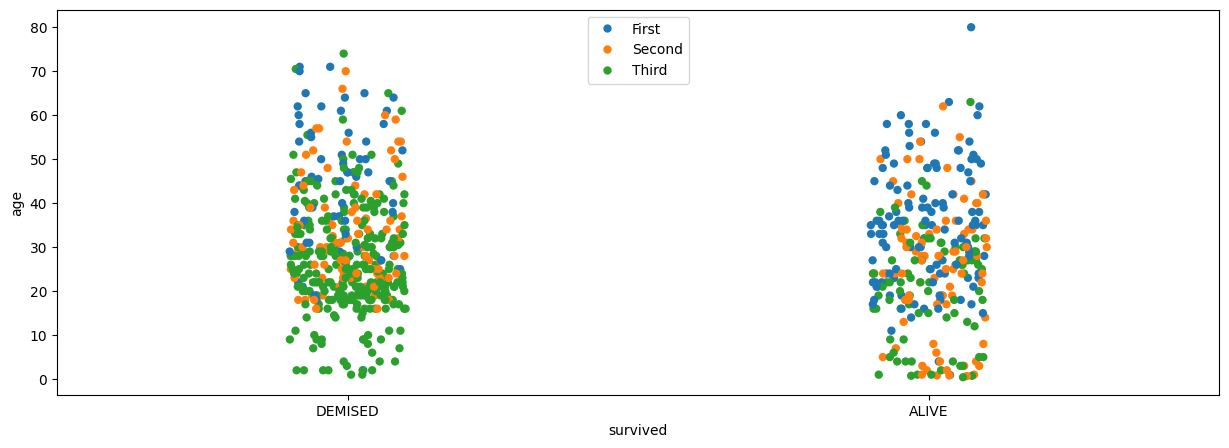

In [ ]:
plt.figure(figsize=(15, 5))
sns.stripplot(data=data, x='survived', y='age', hue='class', size=6)
plt.legend(loc='upper center')
plt.show()

## Pairing plots with Seaborn

In [ ]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

In [ ]:
data_iris = sns.load_dataset('iris')
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


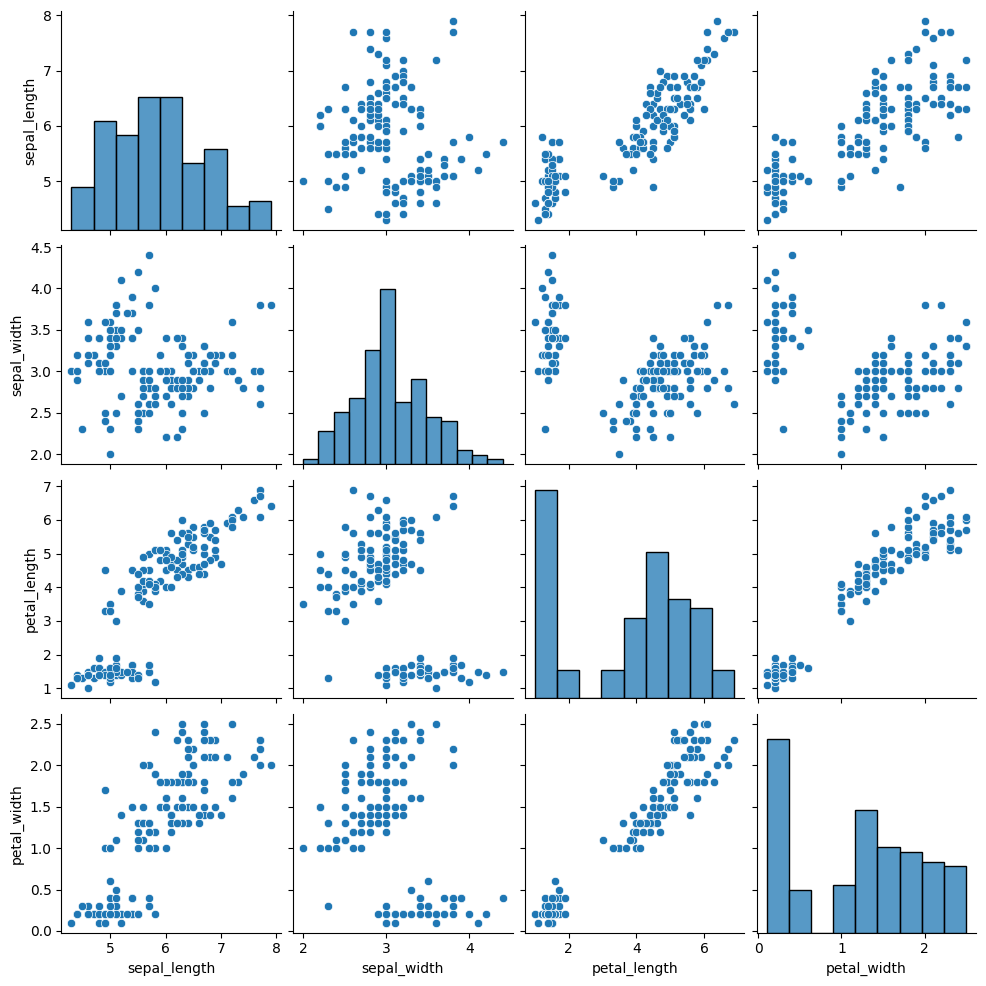

In [ ]:
sns.pairplot(data=data_iris, kind='scatter') #this will shows all of the related graphs, that based on the kind in the parameter, while x=y -> barplot

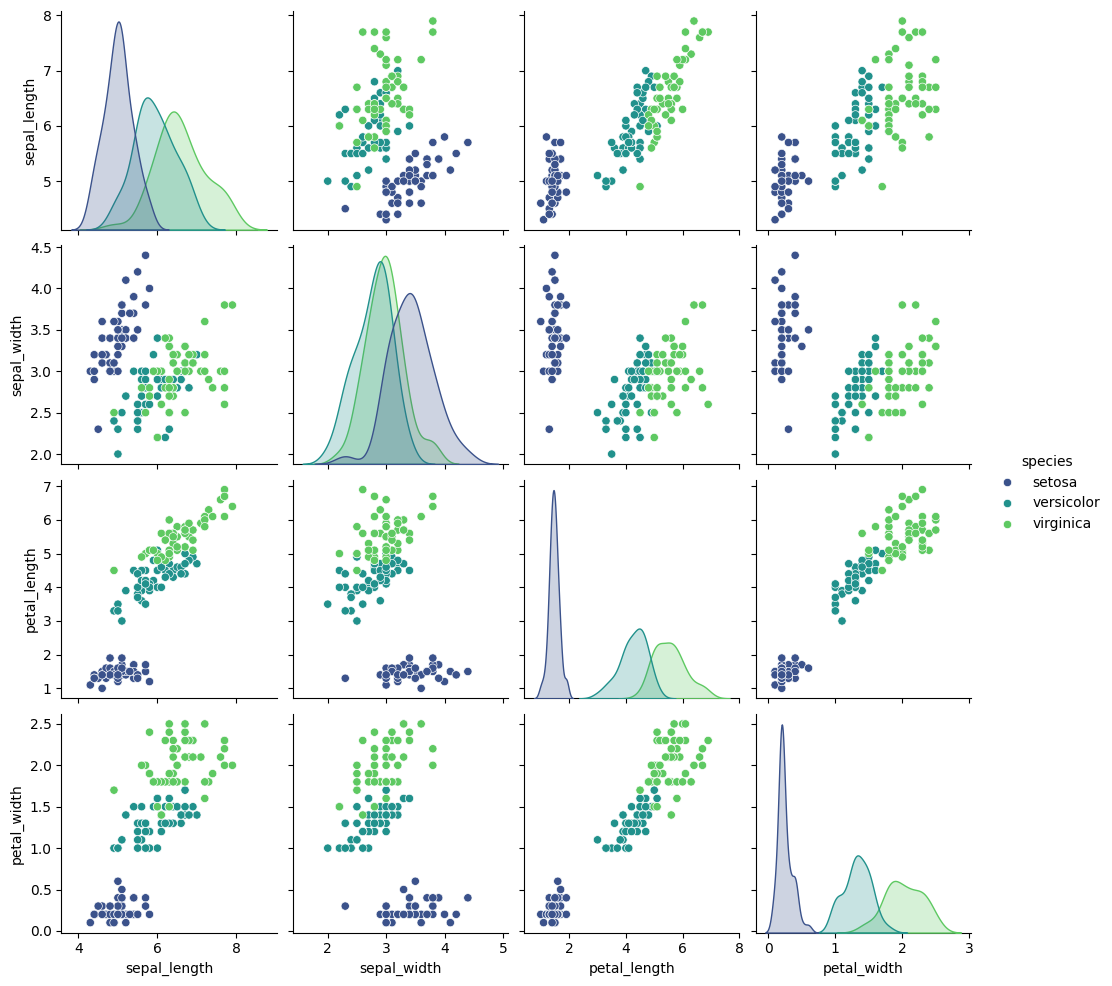

In [ ]:
sns.pairplot(data=data_iris,
             hue='species',
             diag_kind='auto', #this dictate the type of graph where the x and y are the same
             kind='scatter',
             palette='viridis',
             )

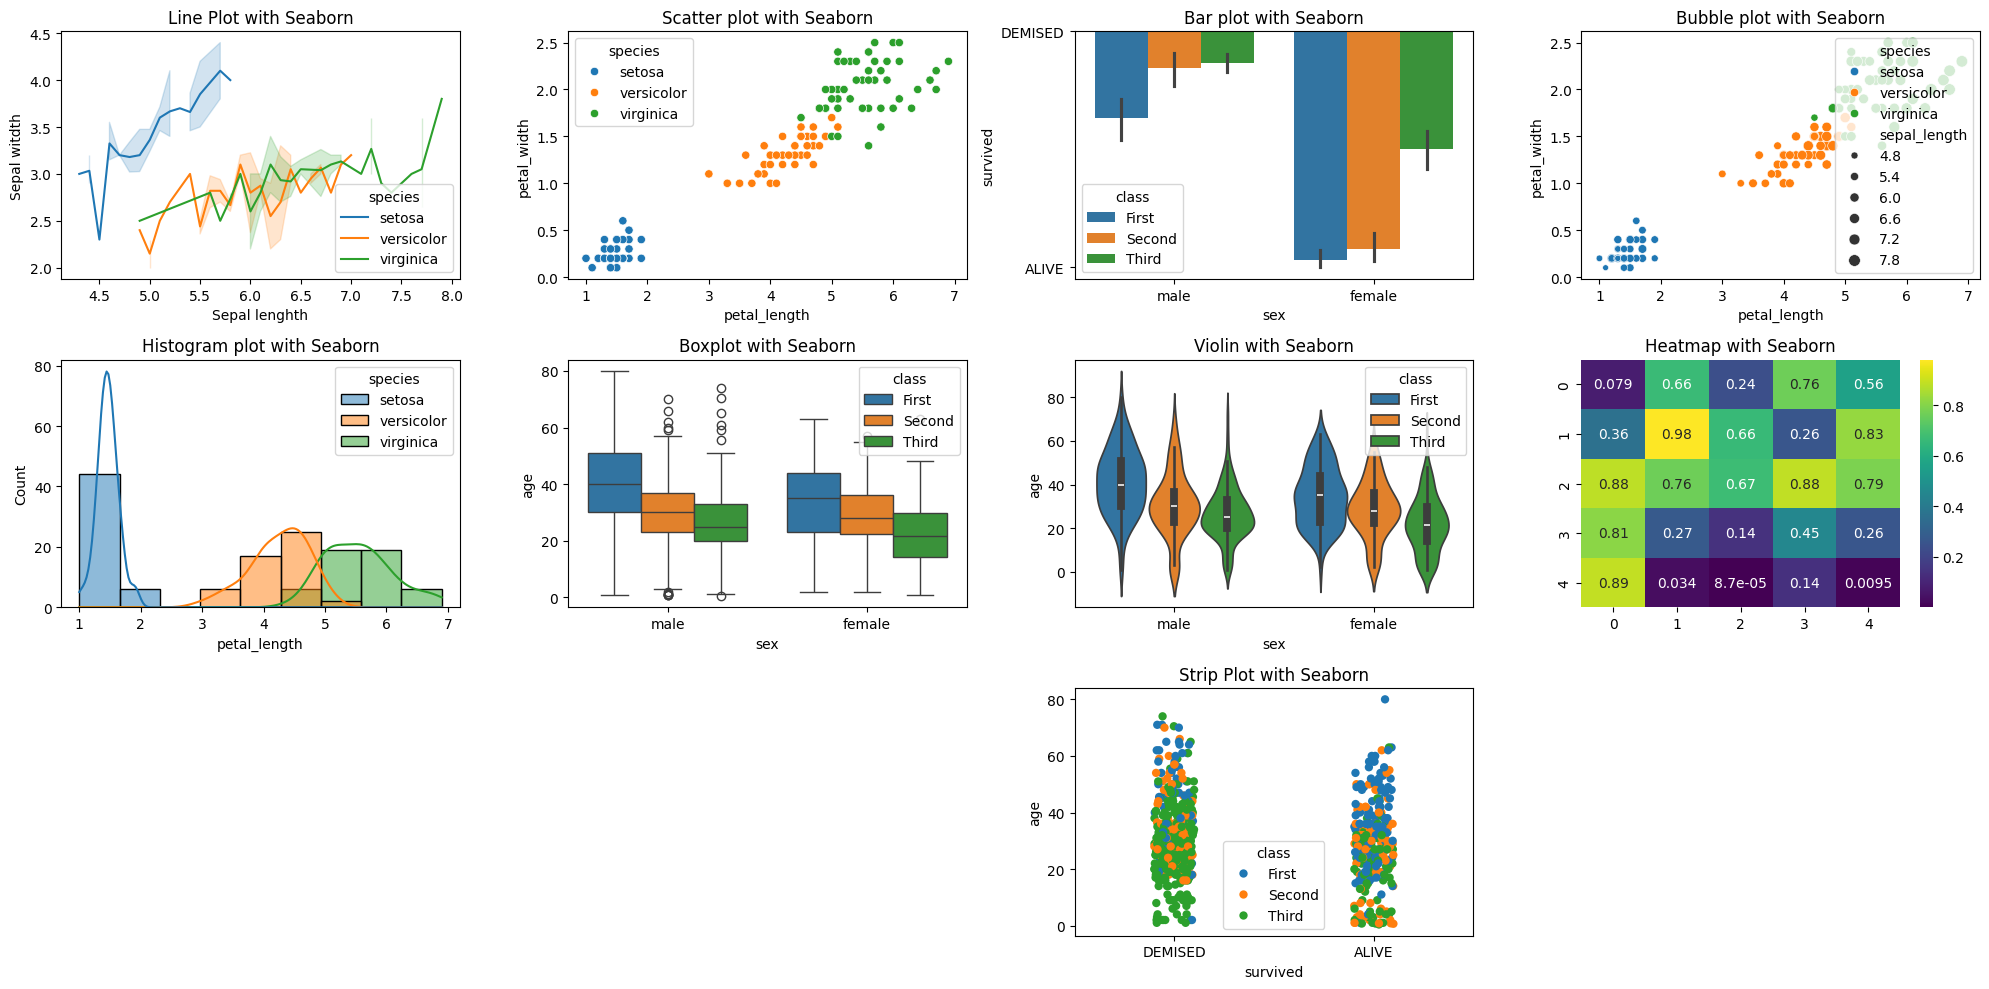

In [ ]:
num_rows, num_cols = 3, 4
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 10))#execute the figure and axes as normal


sns.lineplot(ax = ax[0,0], data=data_iris, x='sepal_length', y='sepal_width', hue='species') #need to notify the graph about the axis too
ax[0,0].set_title("Line Plot with Seaborn") #each the additions needs this
ax[0,0].set_xlabel("Sepal lenghth")
ax[0,0].set_ylabel("Sepal witdth")

sns.scatterplot(ax = ax[0,1], data=data_iris, x='petal_length', y='petal_width', hue='species')
ax[0,1].set_title("Scatter plot with Seaborn")

sns.barplot(ax = ax[0,2],data=data, x='sex', y='survived', hue='class');
ax[0,2].set_title("Bar plot with Seaborn")

sns.scatterplot(ax = ax[0,3], data=data_iris, x='petal_length', y='petal_width', hue='species', size='sepal_length');
ax[0,3].set_title("Bubble plot with Seaborn")


sns.histplot(ax = ax[1,0],data=data_iris, x='petal_length', hue='species', kde=True);
ax[1,0].set_title("Histogram plot with Seaborn")

sns.boxplot(ax = ax[1,1],data=data, x='sex', y='age', hue='class');
ax[1,1].set_title("Boxplot with Seaborn")

sns.violinplot(ax = ax[1,2],data=data, x='sex', y='age', hue='class');
ax[1,2].set_title("Violin with Seaborn")

sns.heatmap(data=square_array, annot = True, cbar=True, ax=ax[1,3], cmap='viridis')
ax[1,3].set_title("Heatmap with Seaborn")

sns.stripplot(data=data, x='survived', y='age', hue='class', size=6, ax=ax[2,2])
ax[2,2].set_title("Strip Plot with Seaborn")

fig.delaxes(ax[2, 0])
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 3])
plt.tight_layout();